In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')
data = pd.DataFrame(dataset.iloc[:,:22])
print(data.STATE)

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = np.array(pd.DataFrame(dataset.iloc[:,22:].values))
Y = Y.reshape(-1)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

0        1
1        1
2        1
3        1
4        1
        ..
44090    2
44091    2
44092    2
44093    2
44094    2
Name: STATE, Length: 44095, dtype: int64
       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  .

In [2]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
import optuna
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np


c:\Users\eddie\anaconda3\envs\SSTP-Injury\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 10, 300)
#     max_depth = trial.suggest_int('max_depth', 1, 50)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
#     max_features = trial.suggest_float('max_features', 0.1, 1.0)


#     clf = RandomForestClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         max_features=max_features,
#         random_state=42,
#         n_jobs=-1
#     )


#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     scores = cross_val_score(clf, X_train, Y_train, cv=cv, scoring='accuracy')

#     return scores.mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50, n_jobs=1)

# print("Best Accuracy:", study.best_value)
# print("Best Hyperparameters:")
# for key, value in study.best_params.items():
#     print(f"  {key}: {value}")

In [6]:
model = RandomForestClassifier(    
    n_estimators = 66, 
    max_depth = 13,
    min_samples_split = 7, 
    min_samples_leaf = 3, 
    max_features = 0.18313436298260266)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=13, max_features=0.18313436298260266,
                       min_samples_leaf=3, min_samples_split=7,
                       n_estimators=66)

In [7]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report

print(classification_report(Y_test,res,digits=6))

[0 1 2 ... 2 2 2]
[0 1 2 ... 2 2 2]
0.9225535775031183
              precision    recall  f1-score   support

           0   0.792844  0.781559  0.787161      1616
           1   0.791494  0.802395  0.796908      1670
           2   1.000000  1.000000  1.000000      5533

    accuracy                       0.922554      8819
   macro avg   0.861446  0.861318  0.861356      8819
weighted avg   0.922557  0.922554  0.922541      8819



In [6]:
import shap 
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

PermutationExplainer explainer:   2%|▏         | 185/8819 [00:18<29:03,  4.95it/s]


KeyboardInterrupt: 

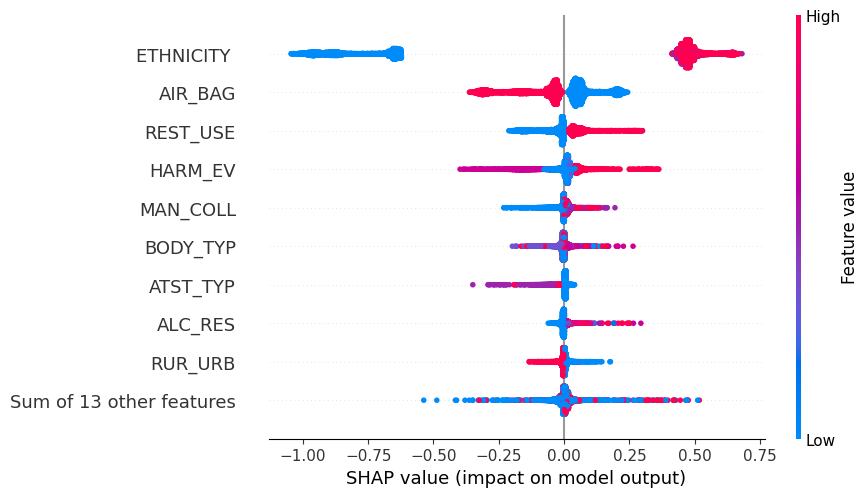

In [14]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

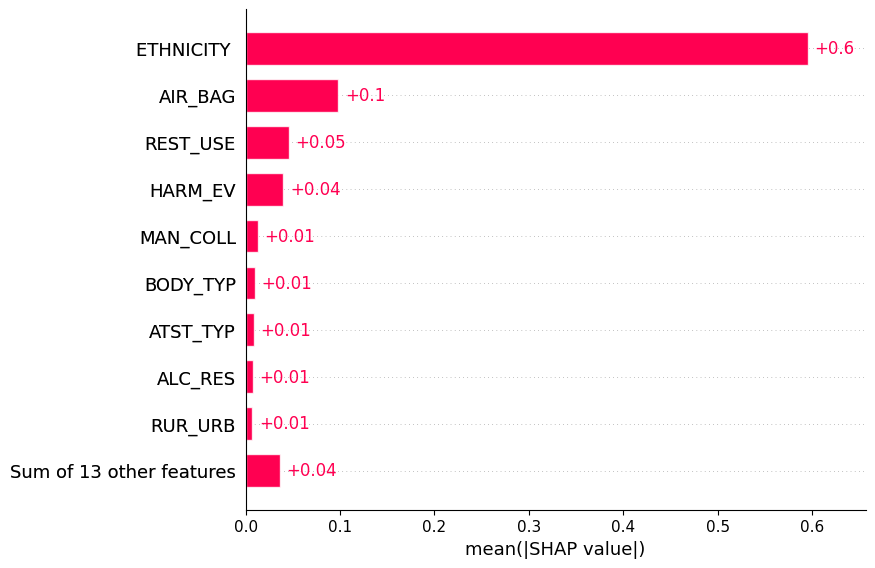

In [15]:
shap.plots.bar(explanation)

In [17]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    shap.plots.waterfall(explanation[i], show=False)
    plt.savefig(os.path.join("shap/rf/waterfall", f"waterfall_{i}.png"), dpi = 300,bbox_inches="tight")
    plt.close()


In [18]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    # shap.plots.waterfall(explanation[i], show=False)
    # shap.initjs()
    shap.force_plot(shap_values[i],feature_names=['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP', 'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ', 'RUR_URB', 'FUNC_SYS', 'IMPACT1'], matplotlib=True, show=False)
    plt.savefig(os.path.join("shap/rf/force/", f"force_{i}.png"), dpi = 300,bbox_inches="tight")
    # shap.save_html(os.path.join("shap/adaboost/force/", f"force_{i}.png"), force_plot)
    plt.close()


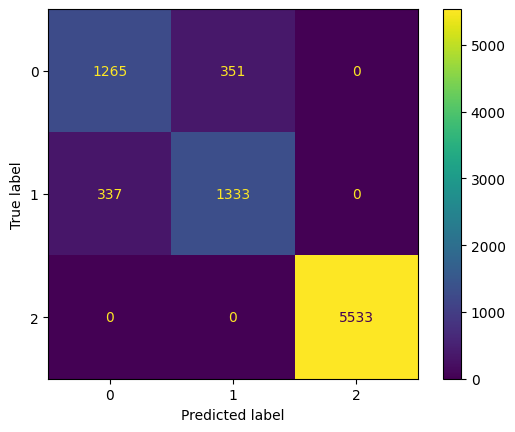

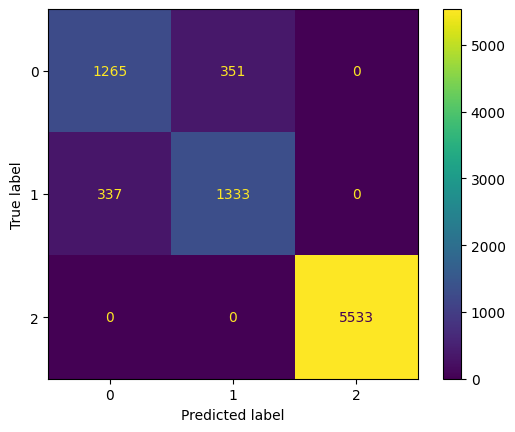

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()
plt.show()

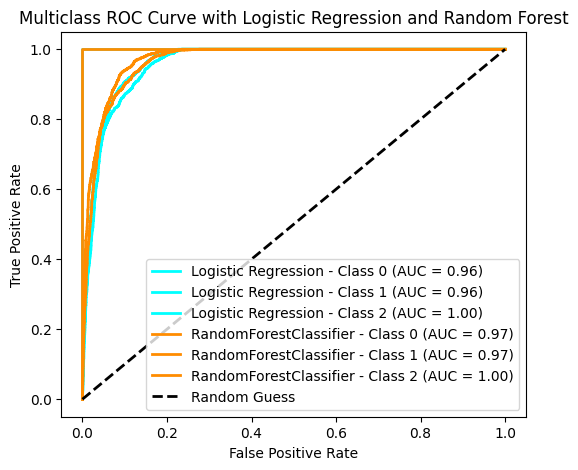

In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

logistic_model = OneVsRestClassifier(LogisticRegression(random_state=42))
logistic_model.fit(X_train, Y_train)

fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = label_binarize(Y_test, classes=np.unique(Y_test))
models = [logistic_model, model]

plt.figure(figsize=(6, 5))
colors = cycle(['aqua', 'darkorange'])

for m, color in zip(models, colors):
    for i in range(m.classes_.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(
            y_test[:, i], m.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        name = m.__class__.__name__
        if(m.__class__.__name__=="OneVsRestClassifier"):
            name = "Logistic Regression"
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{name} - Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with Logistic Regression and Random Forest')
plt.legend(loc="lower right")
plt.show()